# Core Algorithms to be used in TF
- Linear Regression
- Classification
- Clustering
- Hidden Markov Models

## Linear Regression
Linear regression is one of the most basic forms of machine learning and is used to predict numeric values. 

In this tutorial we will use a linear model to predict the survival rate of passangers from the titanic dataset.

*This section is based on the following documentation: https://www.tensorflow.org/tutorials/estimator/linear*

Linear regression follows a very simple concept. If data points are related linearly, we can generate a line of best fit for these points and use it to predict future values.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

### Data
The Titanic data


#### Loading and cleaning data

In [2]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived') # Removing the y labels
y_eval = dfeval.pop('survived') # Remove the y_labels in the evaluation dataset

In [3]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [4]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


<Axes: >

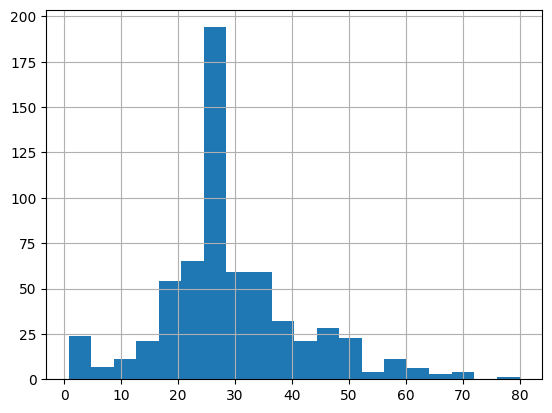

In [5]:
dftrain.age.hist(bins=20)

Text(0.5, 0, '% survive')

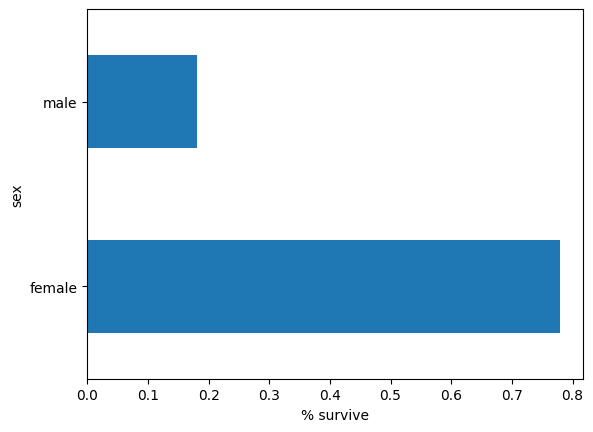

In [6]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

### Training and Testing the data


##### Feature Columns

This dataset has both categorical and numerical data 
- Categorical being "male" or "female"
- Numerical being 0's and 1's

To continue, we have to encode each category with an integer

In [7]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']

NUMERIC_COLUMNS = ['age', 'fare']

feature_colums= []

for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique() #gets unique elements in each column
    feature_colums.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_colums.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_colums)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', 

##### Training and use of input function

Epoch is simply one stream of our entire dataset and determines how many times oyr model will see/view the dataset values

Batches - Small packets/ blocks of our input data that minimizes the amount of computer resource to be used and also help fasten training process of a model

Input Function - Converts our pandas dataframe into the ```tf.data.dataset``` object

In [8]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_fn():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds =ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_fn

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, shuffle=False,num_epochs=1)

##### Creating the Model

In [9]:
lin_model = tf.estimator.LinearClassifier(feature_columns=feature_colums)
clear_output()

##### Train the model

We just pass the input function thatwe created earlier


In [10]:
lin_model.train(train_input_fn)
result = lin_model.evaluate(eval_input_fn)
clear_output()

In [11]:
print(result['accuracy'])

0.7462121


#### Prediction
```.predict()``` function is used


INFO:tensorflow:Calling model_fn.


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Thorne\AppData\Local\Temp\tmp7c6eb9zr\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<Axes: title={'center': 'Predicted Probabilities'}, ylabel='Frequency'>

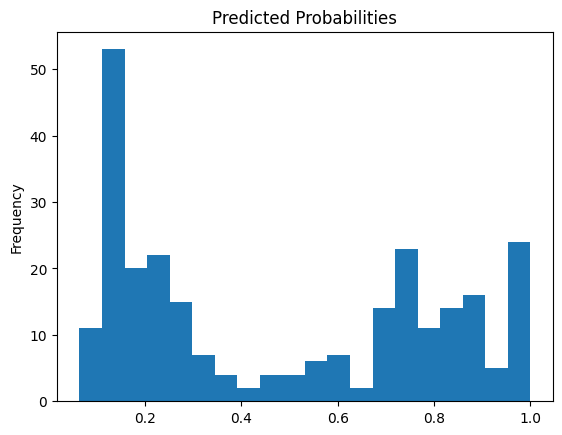

In [12]:
pred_dict = list(lin_model.predict(eval_input_fn))
prob = pd.Series([pred['probabilities'][1] for pred in pred_dict])
prob.plot(kind='hist', bins =20, title= 'Predicted Probabilities')

## Classification

### Loading Data 


In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf

import pandas as pd

In [5]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

In [6]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES,header=0)
test =pd.read_csv(test_path, names= CSV_COLUMN_NAMES,header=0)
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [7]:
train_y = train.pop('Species')
test_y =test.pop('Species')
train_y.head()

0    2
1    1
2    2
3    0
4    0
Name: Species, dtype: int64

In [8]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [9]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)


### Building the  model
we use the ```DNNClassifier``` since the data has no linear correspondence to use the ```LinearClassifier``` model

In [10]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.

INFO:tensorflow:Using default config.

INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Thorne\\AppData\\Local\\Temp\\tmp7af5crnf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker'

### Training the model


In [11]:
classifier.train(
    input_fn = lambda: input_fn(train,train_y, training= True),
    steps=5000
)

Instructions for updating:
Use tf.keras instead.


INFO:tensorflow:Calling model_fn.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Thorne\AppData\Local\Temp\tmp7af5crnf\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 

### Evaluation of the model

In [12]:
eval_result = classifier.evaluate(
    input_fn = lambda: input_fn(test, test_y, training =False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.

INFO:tensorflow:Starting evaluation at 2024-01-16T11:54:07
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Thorne\AppData\Local\Temp\tmp7af5crnf\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.51652s
INFO:tensorflow:Finished evaluation at 2024-01-16-11:54:07
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.9, average_loss = 0.4493192, global_step = 5000, loss = 0.4493192
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\Thorne\AppData\Local\Temp\tmp7af5crnf\model.ckpt-5000

Test set accuracy: 0.900



### Prediction

In [ ]:
import tensorflow as tf
import ipywidgets as widgets
from IPython.display import display

def input_fn(features, batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")

for feature in features:
    text_box = widgets.FloatText(value=0.0, description=feature + ":")
    display(text_box)

    # Wait for the user to input a numeric value
    val = None
    while val is None:
        try:
            val = float(text_box.value)
        except ValueError:
            print("Please enter a valid numeric value.")

    predict[feature] = [val]

# Assume classifier is defined somewhere before this code
# classifier = ...

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))
